# LIBRARIES

In [18]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# LOAD CLASSIFICATION PIPELINE PICKLE

In [19]:
# Load pickle file
with open('fp_classifier.pkl', 'rb') as file:
  pipeline = pickle.load(file)

# Check to make sure
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaled',
                                                                   MinMaxScaler())]),
                                                  ['tenure_in_months',
                                                   'number_of_referrals',
                                                   'total_revenue']),
                                                 ('obj',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['contract', 'offer',
                                                   'online_security',
                                                   'premium_tech_support',
                                                   'device_protection_plan'])])),
                ('classification',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])

Load model classifier `successful`!

# DATA INFERENCE

Creating data inference to `check model classifier` capabilities and the use the predicted Churn (1) to `create clustering model`

In [20]:
rng = np.random.default_rng(seed=42)

n_size = 20000

# Generate the random data
cont = rng.choice(['One Year', 'Two Years', 'Month-to-Month'], size=n_size)
offer = rng.choice(['None', 'Offer A', 'Offer B', 'Offer C', 'Offer D', 'Offer E'], size=n_size)
onl = rng.choice(['Yes', 'No', 'No Internet'], size=n_size)
prem = rng.choice(['Yes', 'No', 'No Internet'], size=n_size)
dev = rng.choice(['Yes', 'No', 'No Internet'], size=n_size)
tenu = rng.uniform(1, 72, n_size)
ref = rng.uniform(0, 11, n_size)
rev = rng.uniform(21.61, 11979.34, n_size)

data_inf = pd.DataFrame({
'contract':cont, 
'offer': offer, 
'online_security':onl, 
'premium_tech_support':prem, 
'device_protection_plan':dev,
'tenure_in_months':tenu,
'number_of_referrals':ref, 
'total_revenue':rev, 
})

# If 'online_security' is 'No Internet'
data_inf.loc[data_inf['online_security'] == 'No Internet', ['premium_tech_support', 'device_protection_plan']] = 'No Internet'

# If 'online_security' is 'Yes'
data_inf.loc[data_inf['online_security'] == 'Yes', ['premium_tech_support', 'device_protection_plan']] = 'Yes'
data_inf.loc[data_inf['online_security'] == 'No', ['premium_tech_support', 'device_protection_plan']] = 'No'
'''
Explaination

If the value in 'Online Security' column is 'No Internet' so is 'Premium Tech Support' & 'Device Protection Plan'
'''

data_inf

,contract,offer,online_security,premium_tech_support,device_protection_plan,tenure_in_months,number_of_referrals,total_revenue
0,One Year,None,No Internet,No Internet,No Internet,63.635919,2.483949,6883.423476
1,Month-to-Month,Offer D,No Internet,No Internet,No Internet,30.396504,2.522155,1205.937551
2,Two Years,Offer A,Yes,Yes,Yes,44.499346,5.950950,8913.964526
3,Two Years,Offer D,No Internet,No Internet,No Internet,10.996884,2.480372,3517.546702
4,Two Years,Offer C,No Internet,No Internet,No Internet,38.418394,2.500649,11482.492232
...,...,...,...,...,...,...,...,...
19995,One Year,Offer E,No,No,No,38.004227,5.037043,2036.867382
19996,One Year,Offer A,No,No,No,2.864328,10.603448,3847.115161
19997,Two Years,Offer D,No Internet,No Internet,No Internet,34.394462,5.941785,1203.254054
19998,Two Years,None,No,No,No,43.924858,10.898551,4167.766823


2000 rows of data inference in 8 feature columns created!

## Predict Classification of Data Inference

In [21]:
y_pred_inf = pipeline.predict(data_inf)
y_pred_inf_df = pd.DataFrame(y_pred_inf,columns=['cust_stat_pred']) # Predicted cluster saved in new column 'cust_stat_pred'

inf_table = pd.concat([data_inf,y_pred_inf_df],axis=1)
inf_table

,contract,offer,online_security,premium_tech_support,device_protection_plan,tenure_in_months,number_of_referrals,total_revenue,cust_stat_pred
0,One Year,None,No Internet,No Internet,No Internet,63.635919,2.483949,6883.423476,0
1,Month-to-Month,Offer D,No Internet,No Internet,No Internet,30.396504,2.522155,1205.937551,0
2,Two Years,Offer A,Yes,Yes,Yes,44.499346,5.950950,8913.964526,0
3,Two Years,Offer D,No Internet,No Internet,No Internet,10.996884,2.480372,3517.546702,0
4,Two Years,Offer C,No Internet,No Internet,No Internet,38.418394,2.500649,11482.492232,0
...,...,...,...,...,...,...,...,...,...
19995,One Year,Offer E,No,No,No,38.004227,5.037043,2036.867382,0
19996,One Year,Offer A,No,No,No,2.864328,10.603448,3847.115161,0
19997,Two Years,Offer D,No Internet,No Internet,No Internet,34.394462,5.941785,1203.254054,0
19998,Two Years,None,No,No,No,43.924858,10.898551,4167.766823,0


### Calculate Percentages of Customer Status Class

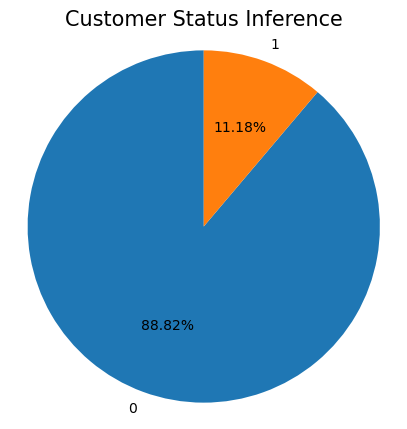

In [22]:
# Calculate percentages
def_count = (inf_table.cust_stat_pred.value_counts(normalize=True) * 100)

# Create Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(def_count, labels=def_count.index, autopct='%1.2f%%', startangle=90)
plt.title("Customer Status Inference", fontsize=15)
plt.axis('equal')  # Equal aspect ratio ENSURES that pie is drawn as a circle
plt.show()

Seems that Inference Data 88.82% classified as `Stayed` (0) & 11.18% as `Churned` (1)

In [23]:
# Check data inference table with customer status prediction in it
inf_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   contract                20000 non-null  object 
 1   offer                   20000 non-null  object 
 2   online_security         20000 non-null  object 
 3   premium_tech_support    20000 non-null  object 
 4   device_protection_plan  20000 non-null  object 
 5   tenure_in_months        20000 non-null  float64
 6   number_of_referrals     20000 non-null  float64
 7   total_revenue           20000 non-null  float64
 8   cust_stat_pred          20000 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


# MODEL CLUSTERING

## Filtering Only The Churned Customer Status

In [24]:
# Select only churned customer
churned_customers = inf_table[inf_table['cust_stat_pred'] == 1]

# Select the features for clustering
features_for_clustering = ['contract', 'offer', 'online_security', 'premium_tech_support',
                           'device_protection_plan', 'tenure_in_months', 'number_of_referrals', 
                           'total_revenue'] # All column but 'cust_stat_pred'

churned_customers_filtered = churned_customers[features_for_clustering]

# Display the first few rows of the filtered DataFrame
churned_customers_filtered

,contract,offer,online_security,premium_tech_support,device_protection_plan,tenure_in_months,number_of_referrals,total_revenue
15,Month-to-Month,Offer E,No,No,No,71.384763,2.396747,6629.964680
22,One Year,None,No,No,No,56.349876,1.585122,11458.981653
27,Month-to-Month,None,No,No,No,70.187279,3.525631,5476.844250
34,Month-to-Month,Offer C,No,No,No,68.833538,1.113978,1267.718207
46,Two Years,None,No,No,No,11.635631,1.690055,5050.254532
...,...,...,...,...,...,...,...,...
19955,Month-to-Month,Offer A,No,No,No,42.108052,0.103813,4585.451708
19958,Month-to-Month,None,No Internet,No Internet,No Internet,58.487909,3.483042,5057.687509
19959,One Year,Offer B,Yes,Yes,Yes,31.562870,1.238590,11318.217466
19968,Month-to-Month,Offer C,No,No,No,58.565273,3.372908,11403.949745


## Find Best Cluster Number

In [25]:
# Identify categorical and numerical columns
categorical_cols = ['contract', 'offer', 'online_security', 'premium_tech_support', 'device_protection_plan']
numerical_cols = ['tenure_in_months', 'number_of_referrals', 'total_revenue']

## Create Preprocessing Pipeline

In [26]:
# For categorical features, use OneHotEncoding; for numerical features, use StandardScaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)])

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['tenure_in_months', 'number_of_referrals',
                                  'total_revenue']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['contract', 'offer', 'online_security',
                                  'premium_tech_support',
                                  'device_protection_plan'])])

## Elbow Method & Silhouette Score

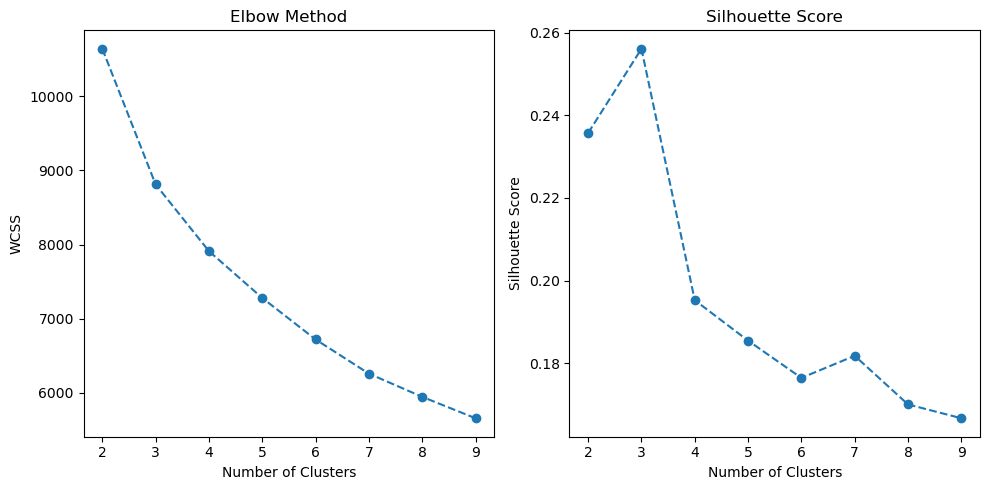

[(2, 0.23570445849763444),
 (3, 0.25607099824256263),
 (4, 0.19528528360038447),
 (5, 0.18550580220278237),
 (6, 0.1764923342685607),
 (7, 0.1818450241156656),
 (8, 0.1700797261155418),
 (9, 0.1667383837400102)]

In [27]:
# Variables to store the results for the Elbow and Silhouette methods
elbow_wcss = []
silhouette_scores = []

# Prepare data for clustering (preprocess the data)
preprocessed_data = preprocessor.fit_transform(churned_customers_filtered)

# Range of possible clusters
cluster_range = range(2, 10)

# Looping through possible numbers of clusters and apply K-Means algorithm
for n_clusters in cluster_range:
    # K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(preprocessed_data)
    
    # Calculate WCSS (Within-cluster Sum of Squares) for the elbow method
    elbow_wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(preprocessed_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS for the elbow method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, elbow_wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Show silhouette scores for different cluster numbers
list(zip(cluster_range, silhouette_scores))

We can't decide `the elbow` from Elbow Method visualization but we can decide that the best cluster number for this data is `3 clusters`

## K-Means Clustering Model

In [28]:
# Create the clustering model using KMeans due to all of the data has been transformed to number

# Use best Silhouette score: 3 clusters
clustering_model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 42)

# Create the full pipeline
# First apply the preprocessing, and then apply KMeans clustering
full_cluster_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('cluster', clustering_model)]) # Adding K-Means clustering model

# Fit the pipeline to the churned customer data
full_cluster_pipeline.fit(churned_customers_filtered)

# Get the cluster predictions and append them back to the DataFrame
cluster_predictions = full_cluster_pipeline.predict(churned_customers_filtered)

churned_customers_filtered['Cluster'] = cluster_predictions

# Display the the DataFrame with the cluster column appended
churned_customers_clustered = churned_customers_filtered.copy()
churned_customers_clustered

,contract,offer,online_security,premium_tech_support,device_protection_plan,tenure_in_months,number_of_referrals,total_revenue,Cluster
15,Month-to-Month,Offer E,No,No,No,71.384763,2.396747,6629.964680,0
22,One Year,None,No,No,No,56.349876,1.585122,11458.981653,0
27,Month-to-Month,None,No,No,No,70.187279,3.525631,5476.844250,0
34,Month-to-Month,Offer C,No,No,No,68.833538,1.113978,1267.718207,0
46,Two Years,None,No,No,No,11.635631,1.690055,5050.254532,0
...,...,...,...,...,...,...,...,...,...
19955,Month-to-Month,Offer A,No,No,No,42.108052,0.103813,4585.451708,0
19958,Month-to-Month,None,No Internet,No Internet,No Internet,58.487909,3.483042,5057.687509,1
19959,One Year,Offer B,Yes,Yes,Yes,31.562870,1.238590,11318.217466,2
19968,Month-to-Month,Offer C,No,No,No,58.565273,3.372908,11403.949745,0


## Clustering Pipeline

Without filter

Which means it won't filter Stayed or Churned class

In [29]:
full_cluster_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_in_months',
                                                   'number_of_referrals',
                                                   'total_revenue']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['contract', 'offer',
                                                   'online_security',
                                                   'premium_tech_support',
                                                   'device_protection_plan'])])),
                ('cluster',
                 KMeans(max_iter=200, n_clusters=3, n_init=10,
                        random_state=42))])

# CLUSTER VISUALIZATION

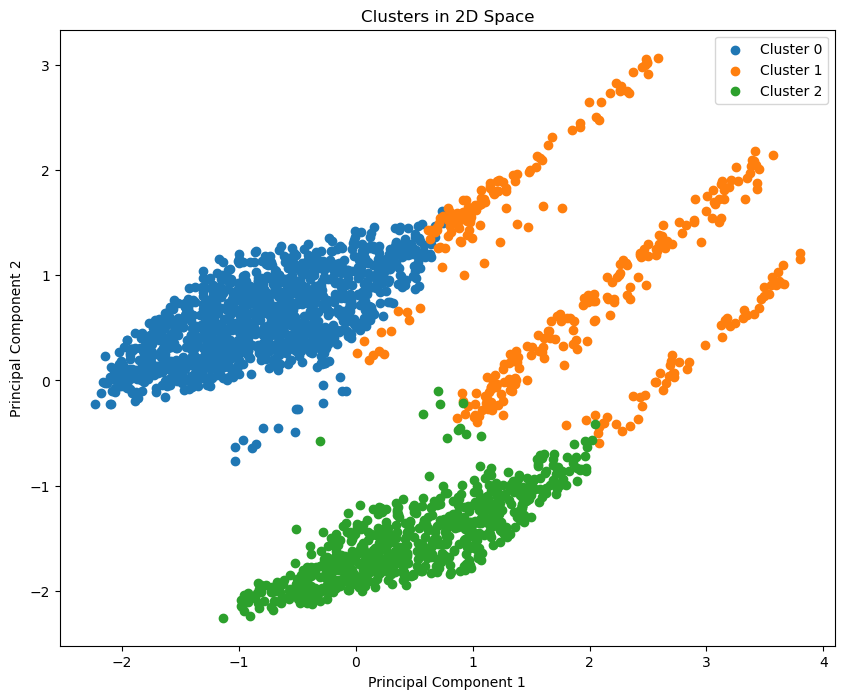

In [30]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(preprocessed_data)

# Convert to DataFrame for easier handling
reduced_df = pd.DataFrame(reduced_data, columns=['Principal Component 1', 'Principal Component 2'])

# Add cluster assignments to the DataFrame
reduced_df['Cluster'] = cluster_predictions

# Create scatter plot
plt.figure(figsize=(10, 8))
for cluster_num in range(0, 3):  # Assuming 3 clusters
    cluster_data = reduced_df[reduced_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Principal Component 1'], cluster_data['Principal Component 2'], label=f'Cluster {cluster_num}')

plt.title('Clusters in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [31]:
churned_customers_clustered['Cluster'].value_counts()

0    1194
2     693
1     349
Name: Cluster, dtype: int64

# CREATE CLASSIFICATION FILTER

In this section we create class filter that just get `Churned` class so the clustering model could predict the cluster of churned customer 

In [32]:
# Custom transformer to filter churned customers and select features
class FilterAndSelect(BaseEstimator, TransformerMixin):
    def __init__(self, churn_column='cust_stat_pred', selected_features=None):
        self.churn_column = churn_column
        self.selected_features = selected_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        churned_customers = X[X[self.churn_column] == 1]    # Select just 'churned' customer
        if self.selected_features:
            return churned_customers[self.selected_features]
        return churned_customers

# Create an instance of the custom transformer
filter_and_select = FilterAndSelect(churn_column='cust_stat_pred', selected_features=features_for_clustering)

# Update the full pipeline to include the new custom transformer
full_cluster_pipeline_with_filter = Pipeline(steps=[('filter_and_select', filter_and_select),
                                            ('preprocessor', preprocessor),
                                            ('cluster', clustering_model)])

## Clustering Pipeline with Classification Filter

In [33]:
full_cluster_pipeline_with_filter

Pipeline(steps=[('filter_and_select',
                 FilterAndSelect(selected_features=['contract', 'offer',
                                                    'online_security',
                                                    'premium_tech_support',
                                                    'device_protection_plan',
                                                    'tenure_in_months',
                                                    'number_of_referrals',
                                                    'total_revenue'])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure_in_months',
                                                   'number_of_referrals',
                                                   'total_revenue']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['contract', 'offer',
                                                   'online_security',
                                                   'premium_tech_support',
                                                   'device_protection_plan'])])),
                ('cluster',
                 KMeans(max_iter=200, n_clusters=3, n_init=10,
                        random_state=42))])

# SAVING CLUSTERING PIPELINE PICKLE

In [34]:
# Save the clustering pipeline with filter
with open("clustering_pipeline_with_filter.pkl", "wb") as f:
    pickle.dump(full_cluster_pipeline_with_filter, f)